# Import libraries and data

In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import copy

import sklearn.preprocessing as preprocessing
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble  import GradientBoostingClassifier as gdb
from sklearn.metrics import roc_curve, auc
import statsmodels.formula.api as smf
from sklearn.ensemble  import RandomForestRegressor as rfr

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [2]:
train = pd.read_csv('data_format1/train_format1.csv')
test = pd.read_csv('data_format1/test_format1.csv')

In [3]:
test.shape

(261477, 3)

In [4]:
user_final = pd.read_csv("user_final.csv", sep='\t')
user_final.drop(columns = {"Unnamed: 0"}, inplace=True)
seller_final = pd.read_csv("seller_final.csv", sep='\t')
seller_final.drop(columns = {"Unnamed: 0"}, inplace=True)
seller_final.head()

,seller_id,click,cart,buy,fav,sellerTotalAction,click_to_buy_ratio,cart_to_buy_ratio,fav_to_buy_ratio,su_click,...,item_count,cat_count,brand_count,item_ratio,cat_ratio,brand_ratio,click_ratio,cart_ratio,buy_ratio,fav_ratio
0,1,308236.0,444.0,17705.0,12755.0,339140.0,-2.856965,3.683585,0.327902,29251.0,...,2977,44,2,0.002730,0.026538,0.000237,0.069011,0.008536,0.018073,0.021270
1,2,2030.0,8.0,189.0,144.0,2371.0,-2.369259,3.049799,0.270290,902.0,...,154,10,1,0.000141,0.006031,0.000118,0.002128,0.000193,0.000380,0.000544
2,3,2399.0,4.0,67.0,175.0,2645.0,-3.563716,2.610070,-0.950976,1103.0,...,171,4,1,0.000157,0.002413,0.000118,0.002602,0.000129,0.000153,0.000643
3,4,2646.0,2.0,294.0,164.0,3106.0,-2.194207,4.588363,0.581030,1384.0,...,155,7,2,0.000142,0.004222,0.000237,0.003265,0.000064,0.000474,0.000655
4,5,7483.0,9.0,144.0,556.0,8192.0,-3.943789,2.674149,-1.345831,3535.0,...,660,23,1,0.000605,0.013872,0.000118,0.008340,0.000290,0.000283,0.001962


In [5]:
user_final.head()

,user_id,age_range,gender,click,add,buy,save,userTotalAction,click_ratio_,add_ratio_,...,index,unique_item,unique_cat,unique_seller,unique_brand,unique_active_day,day_count,month_count,day_norm,rep_buyer
0,376517,6.0,1.0,73.0,0.0,5.0,1.0,79.0,0.924051,0.0,...,376517,39,17,20,20,10,10,3.333,0.592154,1.0
1,234512,5.0,0.0,47.0,0.0,7.0,2.0,56.0,0.839286,0.0,...,234512,29,18,21,20,11,11,3.667,0.651370,1.0
2,344532,5.0,0.0,64.0,0.0,8.0,19.0,91.0,0.703297,0.0,...,344532,54,25,20,21,14,14,2.800,0.829016,1.0
3,186135,5.0,0.0,193.0,0.0,2.0,5.0,200.0,0.965000,0.0,...,186135,21,11,11,10,5,5,5.000,0.296077,0.0
4,30230,5.0,0.0,29.0,0.0,3.0,0.0,32.0,0.906250,0.0,...,30230,24,13,14,14,13,13,2.167,0.769801,0.0


In [6]:
user_final.shape

(331256, 28)

In [7]:
train =train.merge(user_final, how="inner", on = ["user_id"])

In [8]:
train.shape

(205055, 30)

In [9]:
train.isna().sum().sum()

0

In [10]:
train.rename(columns = {"merchant_id":"seller_id"}, inplace=True)

In [11]:
train = train.merge(seller_final, how="inner", on = ["seller_id"])

In [12]:
train.shape

(205055, 52)

In [13]:
label = train["label"]
train.drop(columns = {"label"}, inplace=True)

In [14]:
feature = copy.deepcopy(train)

In [15]:
feature_identity = feature[['user_id','seller_id']]
feature.drop(columns = ['user_id','seller_id'],inplace=True)

In [16]:
feature = pd.DataFrame(columns=feature.columns, data=preprocessing.scale(feature))
feature.head()

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,age_range,gender,click_x,add,buy_x,save,userTotalAction,click_ratio_,add_ratio_,buy_ratio_,...,item_count,cat_count,brand_count,item_ratio,cat_ratio,brand_ratio,click_ratio,cart_ratio,buy_ratio,fav_ratio
0,1.725529,-0.669265,1.407726,-0.194013,2.639150,-0.056918,1.398883,0.495621,-0.171762,-0.281641,...,-0.218709,0.03332,-0.282251,-0.218709,0.03332,-0.282251,-0.249792,-0.36354,-0.764652,-0.324672
1,-0.589278,-0.669265,1.848632,-0.194013,0.298022,1.846891,1.905293,0.325440,-0.171762,-0.893228,...,-0.218709,0.03332,-0.282251,-0.218709,0.03332,-0.282251,-0.249792,-0.36354,-0.764652,-0.324672
2,-0.589278,-0.669265,0.039395,-0.194013,-0.127637,0.851718,0.121242,-0.400072,-0.171762,-0.620913,...,-0.218709,0.03332,-0.282251,-0.218709,0.03332,-0.282251,-0.249792,-0.36354,-0.764652,-0.324672
3,0.182324,1.100018,0.100210,-0.194013,0.191608,-0.359797,0.060844,0.680255,-0.171762,-0.371219,...,-0.218709,0.03332,-0.282251,-0.218709,0.03332,-0.282251,-0.249792,-0.36354,-0.764652,-0.324672
4,-0.589278,-0.669265,0.911072,-0.194013,-0.234052,0.894987,0.920348,0.396786,-0.171762,-0.908117,...,-0.218709,0.03332,-0.282251,-0.218709,0.03332,-0.282251,-0.249792,-0.36354,-0.764652,-0.324672


In [17]:
feature.columns

Index(['age_range', 'gender', 'click_x', 'add', 'buy_x', 'save',
       'userTotalAction', 'click_ratio_', 'add_ratio_', 'buy_ratio_',
       'save_ratio_', 'click_conversion', 'clickconversion_diff',
       'add_conversion', 'addconversion_diff', 'save_conversion',
       'saveconversion_diff', 'index', 'unique_item', 'unique_cat',
       'unique_seller', 'unique_brand', 'unique_active_day', 'day_count',
       'month_count', 'day_norm', 'rep_buyer', 'click_y', 'cart', 'buy_y',
       'fav', 'sellerTotalAction', 'click_to_buy_ratio', 'cart_to_buy_ratio',
       'fav_to_buy_ratio', 'su_click', 'su_cart', 'su_buy', 'su_fav',
       'item_count', 'cat_count', 'brand_count', 'item_ratio', 'cat_ratio',
       'brand_ratio', 'click_ratio', 'cart_ratio', 'buy_ratio', 'fav_ratio'],
      dtype='object')

In [18]:
feature_list = list(feature.columns)

In [19]:
# feature = np.array(feature)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
     feature,label, test_size=0.33, random_state=42, shuffle=True)

# RF

In [21]:
from sklearn.ensemble import RandomForestClassifier
OS=[]
for i in range(10):
    param_grid = {'n_estimators':range(1,51,5)}
    rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
    gs = GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rs = gs.fit(X_train,y_train)
    pred=rs.predict_proba(X_test)[:,1]
    OS.append(rs.score(X_test,y_test))
print("The average out sample: %f"%(np.mean(OS)))
print(rs.best_params_)

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' ins

The average out sample: 0.938598
{'n_estimators': 6}


In [30]:
from sklearn.metrics import roc_auc_score
AUC=[]
for i in range(1,51,5):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))
print (AUC)

[0.553121187604412, 0.5861383318958606, 0.5831935250486481, 0.5875243514917943, 0.5893489262456211, 0.5872499868984797, 0.5889891374660019, 0.5888465857248487, 0.5875041999703904, 0.5888532795312721]


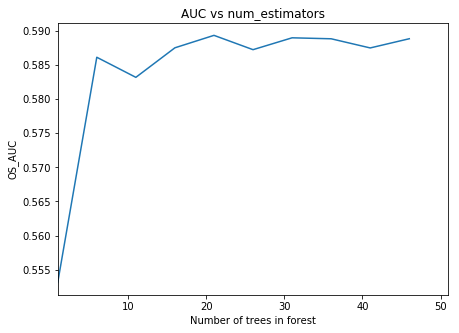

In [31]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(1,51,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,51)
plt.show()

In [48]:
param_grid = {'max_depth':range(1,11)}
dt=RandomForestClassifier(n_estimators = 6)
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print (rs.best_params_)
print (roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 8}
0.6085469373760968


In [55]:
dt=RandomForestClassifier(n_estimators = 6, max_depth = 8).fit(X_train,y_train)

In [56]:
dt.score(X_test,y_test)

0.938553842970932

In [57]:
roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1])

0.6085469373760968

In [52]:
dt = RandomForestClassifier(max_depth=8,n_estimators=6)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
29,buy_y,0.042306
4,buy_x,0.0376613
33,cart_to_buy_ratio,0.0375669
40,cat_count,0.0331218
43,cat_ratio,0.0310929
25,day_norm,0.0307006
13,add_conversion,0.0306623
22,unique_active_day,0.0297135
18,unique_item,0.0291927
12,clickconversion_diff,0.0286293


In [53]:
X_train_simple=X_train.loc[:,["buy_y","buy_x","cart_to_buy_ratio","cat_count","cat_ratio","day_norm","add_conversion",
                             "unique_active_day","unique_item","clickconversion_diff"]]
X_test_simple=X_test.loc[:,["buy_y","buy_x","cart_to_buy_ratio","cat_count","cat_ratio","day_norm","add_conversion",
                             "unique_active_day","unique_item","clickconversion_diff"]]

# Now let's see the performance of this simple model.
dt = RandomForestClassifier(max_depth=7,n_estimators = 6)
dt.fit(X_train_simple, y_train)
print ("The AUC score for this simple model with 10 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1]))

The AUC score for this simple model with 10 features is 0.5869953778442472


In [54]:
dt.score(X_test_simple,y_test)

0.9385981764175619

# NB

In [22]:
#NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print ('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.8341679647125617
Out of sample prediction accuracy: 0.8350204672745275


# Feature Selection

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [62]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False  True  True
 False]
[24 34 25 33 27 40 30 44 45 36 31 35 29 22 13 38 37 41 16 26  4 28 17  3
 20 19 42 11  2  1  8 14  9 12 10  6  5 21 18 15 46 43 23 47 39  7  1  1
 32]


In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03164105 0.01784191 0.03258429 0.006422   0.02884455 0.02658678
 0.032914   0.03292404 0.00648047 0.03334198 0.02818721 0.03158748
 0.03261461 0.02863904 0.02885697 0.03098759 0.03162159 0.03776724
 0.03334679 0.03339653 0.03367769 0.03342649 0.03149825 0.03189754
 0.03408375 0.03091435 0.00664172 0.01120683 0.01080435 0.01168354
 0.01066321 0.01112675 0.01077566 0.01170021 0.01095743 0.01063584
 0.01049467 0.01048666 0.01059993 0.01185081 0.01069349 0.00675852
 0.01114135 0.01041397 0.00697007 0.01110448 0.01061278 0.01014609
 0.01044747]
